# 1. DATAPREPROCESSING

In [1]:
input = "Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA"
print(input)

Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA


In [2]:
#(1)lowercase
lowercase = input.lower()
print("LOWERCSE = ", lowercase)

#re
#pip install re
import re
lowercase_re = re.sub('2015', '2025', lowercase)
print("REGULAR EXP1 = ", lowercase_re)
lowercase_re = re.sub('[a-m]', '*', lowercase)
print("REGULAR EXP2 = ", lowercase_re)
lowercase_re = re.sub('/d', '-', lowercase)
print("REGULAR EXP3 = ", lowercase_re)

LOWERCSE =  brack obama is a prime minister of usa in the year of 2015. narendra modi is the prime minister of india
REGULAR EXP1 =  brack obama is a prime minister of usa in the year of 2025. narendra modi is the prime minister of india
REGULAR EXP2 =  *r*** o**** *s * pr*** **n*st*r o* us* *n t** y**r o* 2015. n*r*n*r* *o** *s t** pr*** **n*st*r o* *n***
REGULAR EXP3 =  brack obama is a prime minister of usa in the year of 2015. narendra modi is the prime minister of india


In [ ]:
#(2)Tokenization
import nltk
from nltk import word_tokenize, sent_tokenize

word_tokens = word_tokenize(input)
print("WORD TOKENS = ", word_tokens)
print(len(word_tokens))
sent_tokens = sent_tokenize(input)
print("SENT TOKENS = ", sent_tokens)
print(len(sent_tokens))

WORD TOKENS =  ['Brack', 'Obama', 'is', 'a', 'prime', 'minister', 'of', 'USA', 'in', 'the', 'year', 'of', '2015', '.', 'NARENDRA', 'MODI', 'is', 'the', 'prime', 'minister', 'of', 'INDIA']
22
SENT TOKENS =  ['Brack Obama is a prime minister of USA in the year of 2015.', 'NARENDRA MODI is the prime minister of INDIA']
2


In [ ]:
#(3)stopwords Removal
from nltk.corpus import stopwords
#print(stopwords.fileids())
stopwords = set(stopwords.words('english'))
#print("\n", stopwords)

tokens_stopwords = []
for token in word_tokens:
    if token not in stopwords:
        tokens_stopwords.append(token)
print(' '.join(tokens_stopwords))

Brack Obama prime minister USA year 2015 . NARENDRA MODI prime minister INDIA


In [ ]:
#Stemmer
stemming = []
from nltk import PorterStemmer
for word in tokens_stopwords:
    stemming.append(PorterStemmer().stem(word))
print(stemming)

['brack', 'obama', 'prime', 'minist', 'usa', 'year', '2015', '.', 'narendra', 'modi', 'prime', 'minist', 'india']


In [ ]:
#Lemmatizer
from nltk import WordNetLemmatizer
lma = []
for word in tokens_stopwords:
    lma.append(WordNetLemmatizer().lemmatize(word))
print(lma)

['Brack', 'Obama', 'prime', 'minister', 'USA', 'year', '2015', '.', 'NARENDRA', 'MODI', 'prime', 'minister', 'INDIA']


In [ ]:
#POS Tags
from nltk import pos_tag
print(pos_tag(word_tokens))

[('Brack', 'NNP'), ('Obama', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('USA', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('2015', 'CD'), ('.', '.'), ('NARENDRA', 'NNP'), ('MODI', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('INDIA', 'NNP')]


# 2. NER

In [10]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

input = "Brack Obama is a prime minister of USA in the year of 2015. NARENDRA MODI is the prime minister of INDIA"
ner = ne_chunk(pos_tag(word_tokenize(input)))
#print(ner)
from nltk.tree import Tree
named_entity = []
for subtree in ner:
    if isinstance(subtree, Tree):
        entity = "".join([token for token, pos in subtree.leaves()])
        named_entity.append(entity)
        print(named_entity)

['Brack']
['Brack', 'Obama']
['Brack', 'Obama', 'USA']
['Brack', 'Obama', 'USA', 'NARENDRA']
['Brack', 'Obama', 'USA', 'NARENDRA', 'INDIA']


In [11]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Barack Obama went as a prime minister of USA in the year of 2015.PM MODI is the prime minister of INDIA."
doc = nlp(text)
named_entity = []
for ent in doc.ents:
    named_entity.append(ent.text)
    print(named_entity)

['Barack Obama']
['Barack Obama', 'USA']
['Barack Obama', 'USA', 'the year']
['Barack Obama', 'USA', 'the year', '2015.PM MODI']
['Barack Obama', 'USA', 'the year', '2015.PM MODI', 'INDIA']


# 3. NER USING SPACY

In [7]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Barack Obama went as a prime minister of USA in the year of 2015.PM MODI is the prime minister of INDIA."
doc = nlp(text)
named_entity = []
for ent in doc.ents:
    named_entity.append(ent.text)
    print(named_entity)

['Barack Obama']
['Barack Obama', 'USA']
['Barack Obama', 'USA', 'the year']
['Barack Obama', 'USA', 'the year', '2015.PM MODI']
['Barack Obama', 'USA', 'the year', '2015.PM MODI', 'INDIA']


# 4. PREDICTIVE ANALYSIS

In [9]:
# TF-IDF
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
vector = TfidfVectorizer()

documents= [ "apple boy cat", "apple cat dog", "dog egg fan" ]

preprocessed = []
for doc in documents:
    tokenization = word_tokenize(doc)
    stop = [ps.stem(word) for word in tokenization if word not in stopwords]
    preprocessed.append(" ".join(stop))
print(preprocessed)
word_score = vector.fit_transform(preprocessed)
print(word_score)

['appl boy cat', 'appl cat dog', 'dog egg fan']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	0.5178561161676974
  (0, 1)	0.680918560398684
  (0, 2)	0.5178561161676974
  (1, 0)	0.5773502691896257
  (1, 2)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 3)	0.4736296010332684
  (2, 4)	0.6227660078332259
  (2, 5)	0.6227660078332259


# 5. SIMPLE LINEAR REGRESSION

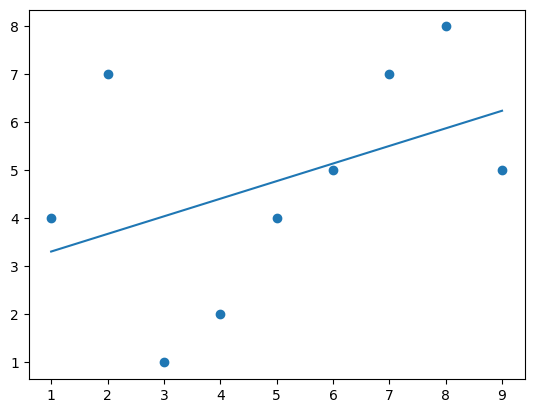

In [13]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9]
y = [4,7,1,2,4,5,7,8,5]

def slr(x):
    return slope * x + intercept

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x,y)

model = list(map(slr, x))
plt.plot(x, model)

plt.scatter(x,y)
plt.show()

# 6. MULTIPLE LINEAR REGRESSION

In [4]:
import pandas as pd
iris = pd.read_csv(r"C:\Users\saksh\Downloads\IRIS.csv")
print(iris)
import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# 7.SLR & MLR WITH PERFORMANCE MATRICS

In [8]:
#PROGRAM 7: SLR & MLR with Performance Metrics:
import pandas as pd
iris = pd.read_csv(r"C:\Users\saksh\Downloads\IRIS.csv")
print(iris)

import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)


import numpy as np

x = iris[['SepalLengthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# 8. KNN

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
y_auc = knn.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[0 1 1 2 1 2 0 0 2 2 2 1 0 0 1 2 2 0 2 0 1 1 0 2 2 0 1 1 1 1]

Accuracy :  0.9666666666666667
Precision :  0.9696969696969697
Recall :  0.9696969696969697
F1-SCORE :  0.9682539682539683
AUC :  0.974884370015949


# 9.DECISION TREE

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

train = DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(y_pred)
y_auc = DT.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 2 0 0 2 2 0 2 0 1 1 2 1 2 2 2 1 1 2 0 1 1 2 0 0 1 2 2 2 1]

Accuracy :  0.9666666666666667
Precision :  0.9666666666666667
Recall :  0.9761904761904763
F1-SCORE :  0.9701104613385314
AUC :  0.9801587301587302


# 10. RANDOM FOREST

In [13]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

train = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(y_pred)
y_auc = RF.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 0 0 1 2 2 1 1 1 0 0 1 1 0 2 1 1 1 0 0 1 2 0 1 0 2 0 0 1 0]

Accuracy :  0.9333333333333333
Precision :  0.9076923076923077
Recall :  0.9076923076923077
F1-SCORE :  0.9076923076923077
AUC :  0.9721628959276017


# 11. SUPPORT VECTOR MACHINE

In [14]:
#Program 11: SVM

from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn import svm
svc_cl = svm.SVC(probability=True)

train = svc_cl.fit(x_train, y_train)
y_pred = svc_cl.predict(x_test)
print(y_pred)
y_auc = svc_cl.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[2 2 1 2 2 2 2 2 1 1 2 1 2 0 1 1 1 2 0 0 0 1 2 1 1 0 0 2 2 0]

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-SCORE :  1.0
AUC :  1.0


# 12. K-Means Clustering Algorithm

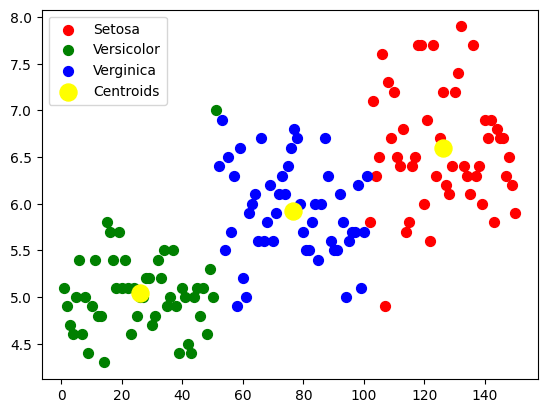

In [5]:
import pandas as pd
iris = pd.read_csv(r"C:\Users\saksh\Downloads\IRIS.csv")
x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)
# print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=50, c='red', label='Setosa')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=50, c='green', label='Versicolor')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=50, c='blue', label='Verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='yellow', label='Centroids')

plt.legend()
plt.show()

# 15. KMeans Clustering in 3D

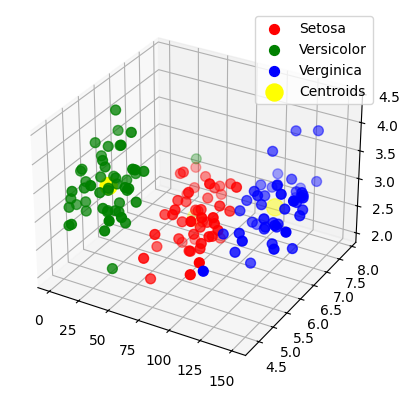

In [2]:
#Prog 15: KMeans Clustering in 3D

import pandas as pd
iris = pd.read_csv(r"C:\Users\saksh\Downloads\IRIS.csv")

x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)
# print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_pred == 0,0], x[y_pred == 0,1], x[y_pred == 0,2], s=50, c='red', label='Setosa')
ax.scatter(x[y_pred == 1,0], x[y_pred == 1,1], x[y_pred == 1,2], s=50, c='green', label='Versicolor')
ax.scatter(x[y_pred == 2,0], x[y_pred == 2,1], x[y_pred == 2,2], s=50, c='blue', label='Verginica')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=150, c='yellow', label='Centroids')

plt.legend()
plt.show()

# 16. Hierarchical Clustering


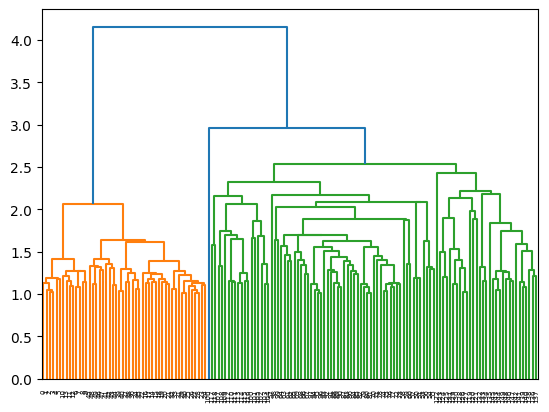

In [4]:
#Program 16: Hierarchical Clustering

import pandas as pd
iris = pd.read_csv(r"C:\Users\saksh\Downloads\IRIS.csv")

x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_pred = hc.fit_predict(x)
#print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
plt.scatter(x[kmeans == 0,0], x[kmeans == 0,1], s=50, c='red', label='Setosa')
plt.scatter(x[kmeans == 1,0], x[kmeans == 1,1], s=50, c='green', label='Versicolor')
plt.scatter(x[kmeans == 2,0], x[kmeans == 2,1], s=50, c='blue', label='Verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='yellow', label='Centroids')

from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(x))
plt.show()